In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import numpy as np

In [5]:
cardio_dataset = pd.read_csv('CardioGoodFitness.csv')

In [6]:
cardio_dataset.head()

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
0,TM195,18,Male,14,Single,3,4,29562,112
1,TM195,19,Male,15,Single,2,3,31836,75
2,TM195,19,Female,14,Partnered,4,3,30699,66
3,TM195,19,Male,12,Single,3,3,32973,85
4,TM195,20,Male,13,Partnered,4,2,35247,47


In [14]:
cardio_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Product        180 non-null    object
 1   Age            180 non-null    int64 
 2   Gender         180 non-null    object
 3   Education      180 non-null    int64 
 4   MaritalStatus  180 non-null    object
 5   Usage          180 non-null    int64 
 6   Fitness        180 non-null    int64 
 7   Income         180 non-null    int64 
 8   Miles          180 non-null    int64 
dtypes: int64(6), object(3)
memory usage: 12.8+ KB


In [15]:
cardio_dataset.isna().any()

Product          False
Age              False
Gender           False
Education        False
MaritalStatus    False
Usage            False
Fitness          False
Income           False
Miles            False
dtype: bool

In [17]:
# descriptive statistics for all columns
cardio_dataset.describe(include='all')

,Product,Age,Gender,Education,MaritalStatus,Usage,Fitness,Income,Miles
count,180,180.000000,180,180.000000,180,180.000000,180.000000,180.000000,180.000000
unique,3,NaN,2,NaN,2,NaN,NaN,NaN,NaN
top,TM195,NaN,Male,NaN,Partnered,NaN,NaN,NaN,NaN
freq,80,NaN,104,NaN,107,NaN,NaN,NaN,NaN
mean,NaN,28.788889,NaN,15.572222,NaN,3.455556,3.311111,53719.577778,103.194444
std,NaN,6.943498,NaN,1.617055,NaN,1.084797,0.958869,16506.684226,51.863605
min,NaN,18.000000,NaN,12.000000,NaN,2.000000,1.000000,29562.000000,21.000000
25%,NaN,24.000000,NaN,14.000000,NaN,3.000000,3.000000,44058.750000,66.000000
50%,NaN,26.000000,NaN,16.000000,NaN,3.000000,3.000000,50596.500000,94.000000
75%,NaN,33.000000,NaN,16.000000,NaN,4.000000,4.000000,58668.000000,114.750000


In [18]:
cardio_dataset_df = pd.DataFrame(cardio_dataset)

In [22]:
pd.crosstab(cardio_dataset['Product'],cardio_dataset['Gender'] )

Gender,Female,Male
Product,,
TM195,40,40
TM498,29,31
TM798,7,33


In [24]:
pd.crosstab(cardio_dataset['Product'],cardio_dataset['MaritalStatus'] )

MaritalStatus,Partnered,Single
Product,,
TM195,48,32
TM498,36,24
TM798,23,17


<AxesSubplot:xlabel='Product', ylabel='count'>

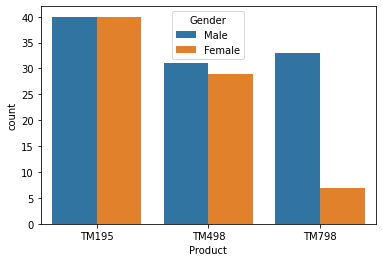

In [30]:
sn.countplot(x='Product',hue='Gender',data=cardio_dataset)

<AxesSubplot:xlabel='Product', ylabel='count'>

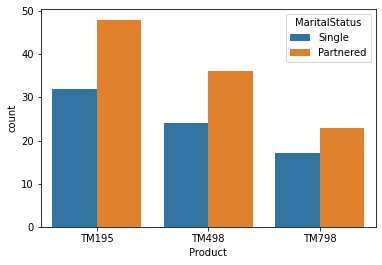

In [31]:
sn.countplot(x='Product',hue='MaritalStatus',data=cardio_dataset)

<AxesSubplot:xlabel='Product', ylabel='count'>

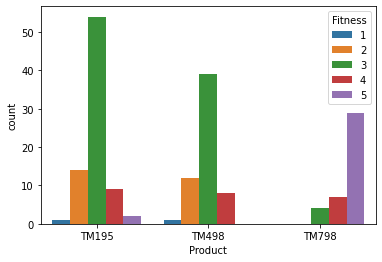

In [32]:
sn.countplot(x='Product',hue='Fitness',data=cardio_dataset)

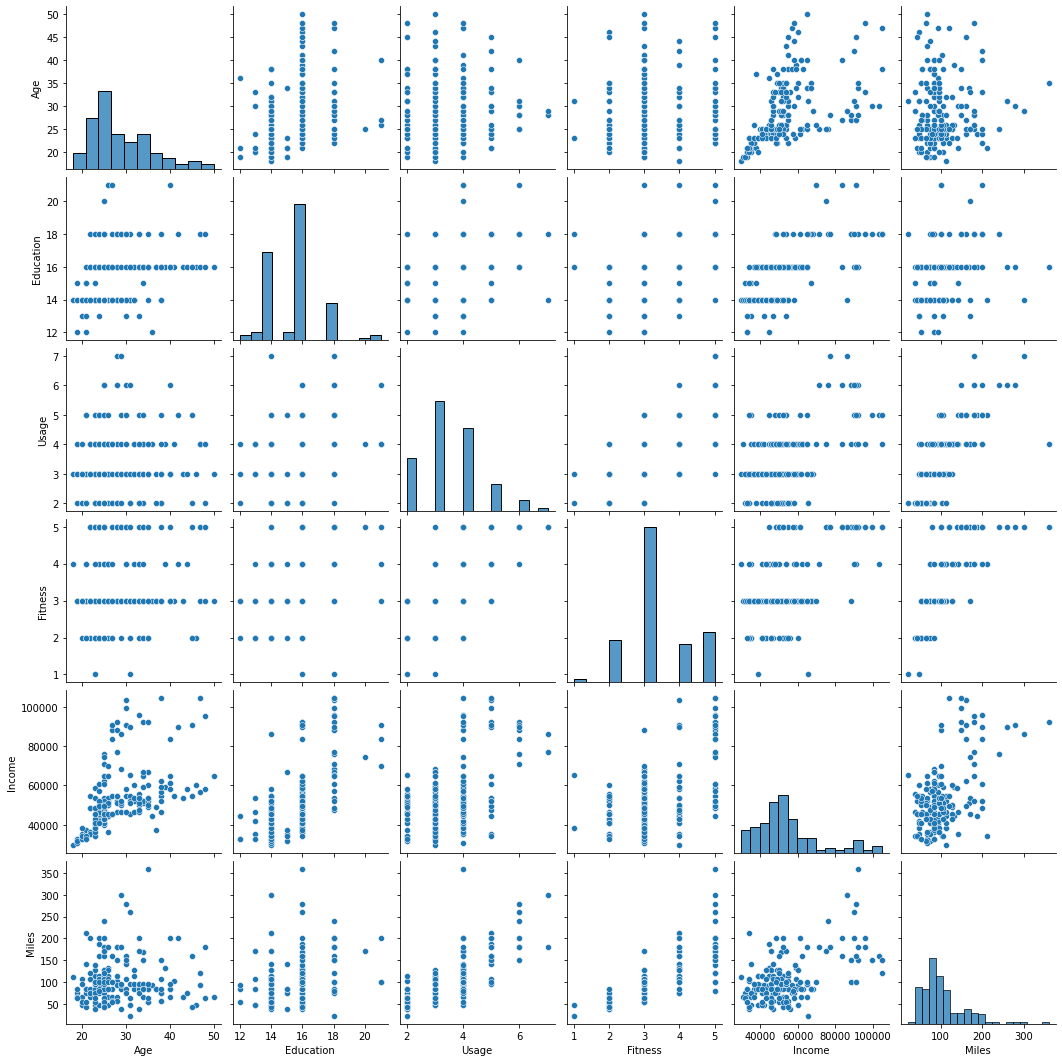

In [34]:
sn.pairplot(cardio_dataset)

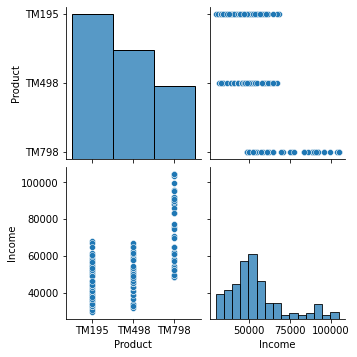

In [37]:
sn.pairplot(cardio_dataset, vars=["Product", "Income"])

In [25]:
# get correlation matrix of all
corr_matrix = cardio_dataset_df.corr()
corr_matrix

,Age,Education,Usage,Fitness,Income,Miles
Age,1.000000,0.280496,0.015064,0.061105,0.513414,0.036618
Education,0.280496,1.000000,0.395155,0.410581,0.625827,0.307284
Usage,0.015064,0.395155,1.000000,0.668606,0.519537,0.759130
Fitness,0.061105,0.410581,0.668606,1.000000,0.535005,0.785702
Income,0.513414,0.625827,0.519537,0.535005,1.000000,0.543473
Miles,0.036618,0.307284,0.759130,0.785702,0.543473,1.000000


<AxesSubplot:>

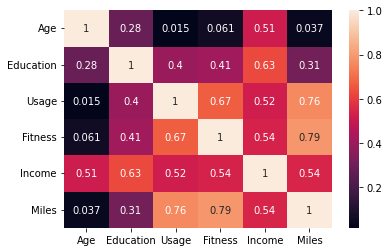

In [28]:
sn.heatmap(corr_matrix,annot=True)

How do income and Fitness afect the decision of which model is bought?

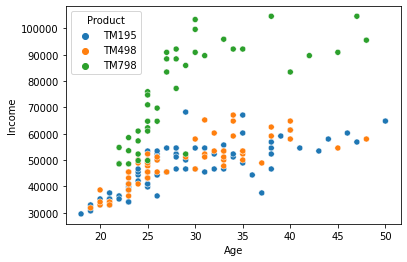

In [88]:

sn.scatterplot(x='Age', y='Income',data=cardio_dataset, hue = 'Product')
plt.show()

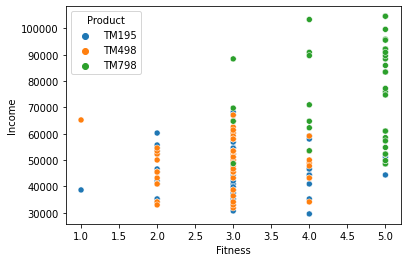

In [90]:
# those with higher fitness level have more income
sn.scatterplot(x='Fitness', y='Income',data=cardio_dataset, hue = 'Product')
plt.show()

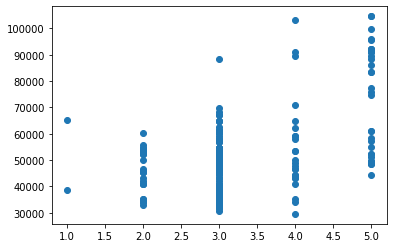

In [95]:
plt.scatter(x='Fitness', y='Income', data = cardio_dataset)
plt.show()

In [138]:
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC

In [139]:
X = cardio_dataset_df[['Income', 'Fitness', 'Age', 'Gender', 'MaritalStatus']]

In [145]:
X = pd.get_dummies(X)
X

,Income,Fitness,Age,Gender_Female,Gender_Male,MaritalStatus_Partnered,MaritalStatus_Single
0,29562,4,18,0,1,0,1
1,31836,3,19,0,1,0,1
2,30699,3,19,1,0,1,0
3,32973,3,19,0,1,0,1
4,35247,2,20,0,1,1,0
...,...,...,...,...,...,...,...
175,83416,5,40,0,1,0,1
176,89641,4,42,0,1,0,1
177,90886,5,45,0,1,0,1
178,104581,5,47,0,1,1,0


In [146]:
Y = cardio_dataset_df[['Product']]
Y

,Product
0,TM195
1,TM195
2,TM195
3,TM195
4,TM195
...,...
175,TM798
176,TM798
177,TM798
178,TM798


In [160]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.4, random_state=42)

In [161]:
cls = SVC().fit(X_train, y_train)

C:\Users\Sajiah Naqib\anaconda3\envs\adm\lib\site-packages\sklearn\utils\validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [162]:
from sklearn.metrics import accuracy_score, precision_score,f1_score, classification_report, confusion_matrix, recall_score

In [163]:
accuracy_train = accuracy_score(y_train, cls.predict(X_train))
accuracy_test = accuracy_score(y_test, cls.predict(X_test))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 54.63%
Test Accuracy: 59.72%


In [164]:
predictions = cls.predict(X_test)

In [165]:
print(classification_report(y_test, predictions, digits=3))

              precision    recall  f1-score   support

       TM195      0.532     1.000     0.695        33
       TM498      0.000     0.000     0.000        20
       TM798      1.000     0.526     0.690        19

    accuracy                          0.597        72
   macro avg      0.511     0.509     0.461        72
weighted avg      0.508     0.597     0.500        72



C:\Users\Sajiah Naqib\anaconda3\envs\adm\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sajiah Naqib\anaconda3\envs\adm\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Sajiah Naqib\anaconda3\envs\adm\lib\site-packages\sklearn\metrics\_classification.py:1308: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [166]:
print(confusion_matrix(y_test, predictions))

[[33  0  0]
 [20  0  0]
 [ 9  0 10]]


Trying: Decision Trees (Catboost)

In [167]:
from catboost import CatBoostClassifier

In [168]:
cmodel = CatBoostClassifier(iterations=500,
                               task_type="CPU",
                               devices='0:1')
catboost_model = cmodel.fit(X_train, y_train, verbose=True)


Learning rate set to 0.126881
0:	learn: 1.0587367	total: 3.59ms	remaining: 1.79s
1:	learn: 1.0152538	total: 6.83ms	remaining: 1.7s
2:	learn: 0.9793258	total: 10ms	remaining: 1.66s
3:	learn: 0.9481746	total: 13.3ms	remaining: 1.65s
4:	learn: 0.9218454	total: 16.8ms	remaining: 1.67s
5:	learn: 0.8976763	total: 20.4ms	remaining: 1.68s
6:	learn: 0.8809466	total: 23.8ms	remaining: 1.68s
7:	learn: 0.8602089	total: 27ms	remaining: 1.66s
8:	learn: 0.8446503	total: 29.5ms	remaining: 1.61s
9:	learn: 0.8405086	total: 31.4ms	remaining: 1.54s
10:	learn: 0.8181839	total: 35.4ms	remaining: 1.57s
11:	learn: 0.7993646	total: 38.2ms	remaining: 1.55s
12:	learn: 0.7855460	total: 41.6ms	remaining: 1.56s
13:	learn: 0.7722164	total: 45ms	remaining: 1.56s
14:	learn: 0.7582183	total: 48.4ms	remaining: 1.56s
15:	learn: 0.7465757	total: 51.3ms	remaining: 1.55s
16:	learn: 0.7340047	total: 54.1ms	remaining: 1.54s
17:	learn: 0.7207282	total: 57ms	remaining: 1.53s
18:	learn: 0.7075961	total: 60ms	remaining: 1.52s
19:

211:	learn: 0.2130543	total: 643ms	remaining: 873ms
212:	learn: 0.2123900	total: 646ms	remaining: 870ms
213:	learn: 0.2117724	total: 650ms	remaining: 868ms
214:	learn: 0.2111543	total: 653ms	remaining: 865ms
215:	learn: 0.2106757	total: 656ms	remaining: 862ms
216:	learn: 0.2099016	total: 659ms	remaining: 859ms
217:	learn: 0.2092914	total: 661ms	remaining: 856ms
218:	learn: 0.2083507	total: 664ms	remaining: 852ms
219:	learn: 0.2077663	total: 667ms	remaining: 849ms
220:	learn: 0.2073017	total: 670ms	remaining: 846ms
221:	learn: 0.2068573	total: 673ms	remaining: 843ms
222:	learn: 0.2060692	total: 676ms	remaining: 839ms
223:	learn: 0.2052531	total: 679ms	remaining: 836ms
224:	learn: 0.2047941	total: 682ms	remaining: 833ms
225:	learn: 0.2041206	total: 685ms	remaining: 830ms
226:	learn: 0.2034477	total: 688ms	remaining: 828ms
227:	learn: 0.2024130	total: 691ms	remaining: 825ms
228:	learn: 0.2013029	total: 695ms	remaining: 823ms
229:	learn: 0.2006057	total: 699ms	remaining: 820ms
230:	learn: 

371:	learn: 0.1415204	total: 1.13s	remaining: 388ms
372:	learn: 0.1410236	total: 1.13s	remaining: 385ms
373:	learn: 0.1407477	total: 1.14s	remaining: 382ms
374:	learn: 0.1405327	total: 1.14s	remaining: 379ms
375:	learn: 0.1403749	total: 1.14s	remaining: 376ms
376:	learn: 0.1399775	total: 1.14s	remaining: 373ms
377:	learn: 0.1397185	total: 1.15s	remaining: 370ms
378:	learn: 0.1394852	total: 1.15s	remaining: 367ms
379:	learn: 0.1392473	total: 1.15s	remaining: 364ms
380:	learn: 0.1390260	total: 1.16s	remaining: 361ms
381:	learn: 0.1388411	total: 1.16s	remaining: 358ms
382:	learn: 0.1385278	total: 1.16s	remaining: 355ms
383:	learn: 0.1382769	total: 1.16s	remaining: 352ms
384:	learn: 0.1380029	total: 1.17s	remaining: 349ms
385:	learn: 0.1379186	total: 1.17s	remaining: 346ms
386:	learn: 0.1376475	total: 1.17s	remaining: 343ms
387:	learn: 0.1373494	total: 1.18s	remaining: 340ms
388:	learn: 0.1370910	total: 1.18s	remaining: 337ms
389:	learn: 0.1367995	total: 1.18s	remaining: 334ms
390:	learn: 

In [169]:
accuracy_train = accuracy_score(y_train, catboost_model.predict(X_train))
accuracy_test = accuracy_score(y_test, catboost_model.predict(X_test))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 98.15%
Test Accuracy: 58.33%


In [170]:
predictions = catboost_model.predict(X_test)
print(classification_report(y_test, predictions, digits=3))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

       TM195      0.562     0.545     0.554        33
       TM498      0.304     0.350     0.326        20
       TM798      1.000     0.895     0.944        19

    accuracy                          0.583        72
   macro avg      0.622     0.597     0.608        72
weighted avg      0.606     0.583     0.594        72

[[18 15  0]
 [13  7  0]
 [ 1  1 17]]


In [171]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(n_estimators = 500)
rf_model = model.fit(X_train, y_train)

C:\Users\Sajiah Naqib\AppData\Local\Temp\ipykernel_18196\3195199177.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model = model.fit(X_train, y_train)


In [172]:
accuracy_train = accuracy_score(y_train, rf_model.predict(X_train))
accuracy_test = accuracy_score(y_test, rf_model.predict(X_test))
print('\nTrain Accuracy:{: .2f}%'.format(accuracy_train*100))
print('Test Accuracy:{: .2f}%'.format(accuracy_test*100))


Train Accuracy: 98.15%
Test Accuracy: 56.94%


In [173]:
predictions = rf_model.predict(X_test)
print(classification_report(y_test, predictions, digits=3))
print(confusion_matrix(y_test, predictions))

              precision    recall  f1-score   support

       TM195      0.545     0.545     0.545        33
       TM498      0.304     0.350     0.326        20
       TM798      1.000     0.842     0.914        19

    accuracy                          0.569        72
   macro avg      0.617     0.579     0.595        72
weighted avg      0.598     0.569     0.582        72

[[18 15  0]
 [13  7  0]
 [ 2  1 16]]
